<a href="https://colab.research.google.com/github/tensorush/Advent-of-Code/blob/master/Notebooks/Regression%20Models/Kernel%20Regression%20with%20Numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

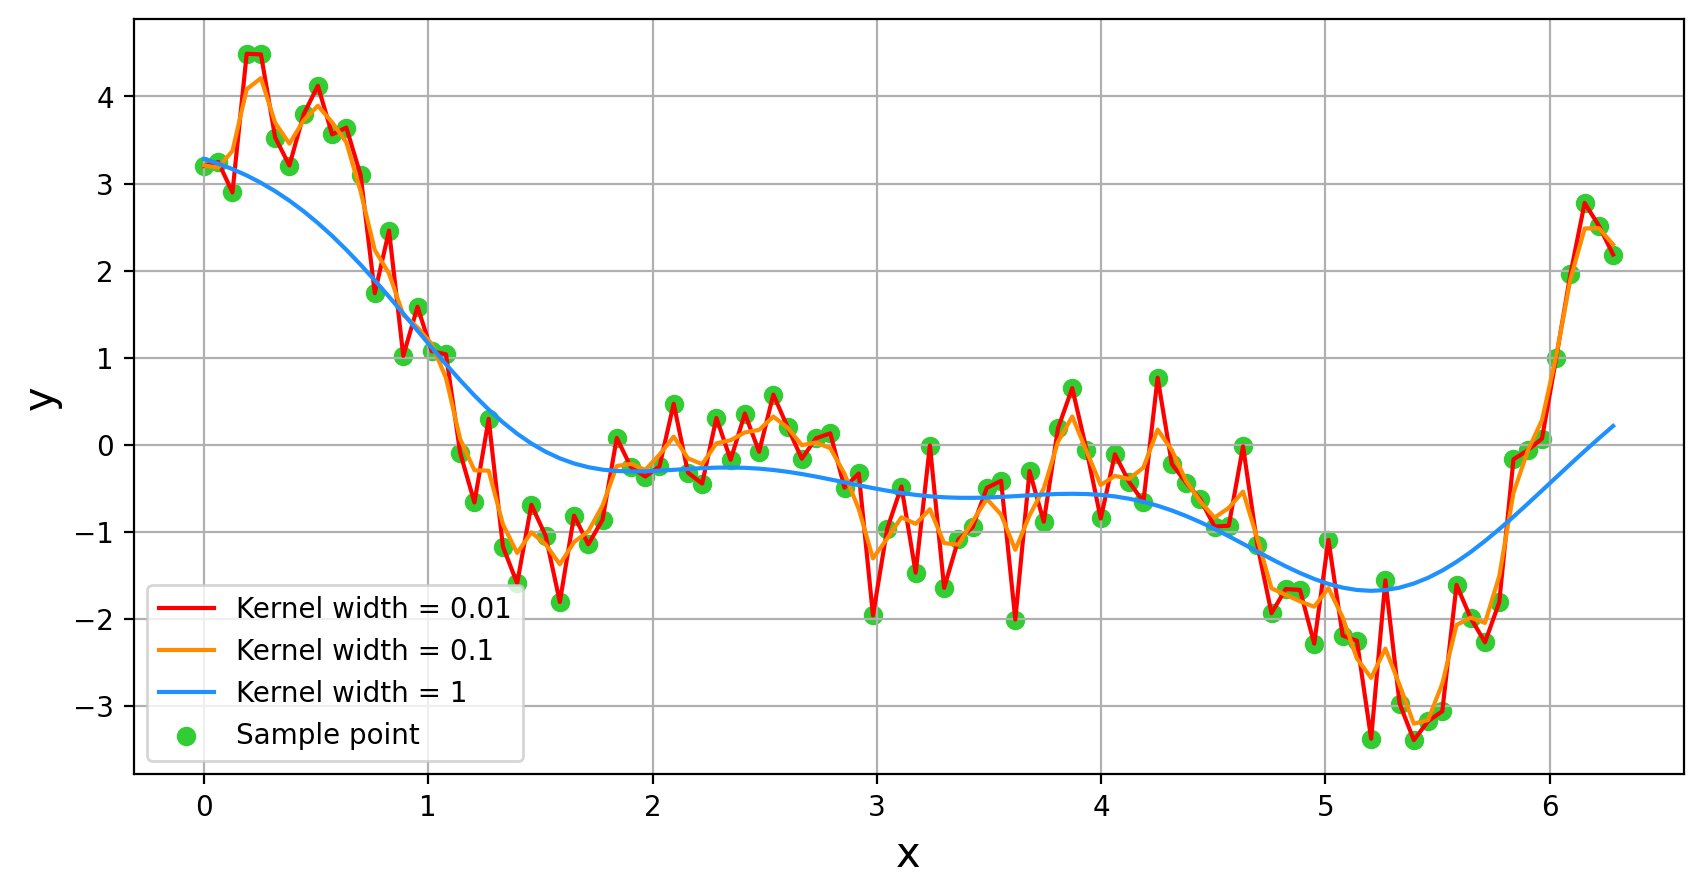

In [3]:
import numba
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt


@numba.jit(nopython=True, parallel=True)
def generate_random_sample(x: np.linspace,
                           num_points: int, max_frequency: int = 4,
                           noise_mean: float = 0.0, noise_std: float = 0.5):
    y = np.zeros_like(x)
    for frequency in numba.prange(1, max_frequency):
        y += np.cos(frequency * x) + np.sin(frequency * x)
    y += np.random.normal(noise_mean, noise_std, y.shape)
    return x, y


def compute_kernel_regression(num_points: int, x: np.array, y: np.array):
    model_x = np.linspace(x[0], x[-1], num=num_points)
    model_y = np.zeros((len(kernel_widths), len(model_x)))
    for kernel_width in range(len(kernel_widths)):
        for i in range(len(model_x)):
            convolved_signal = kernel(np.sqrt((model_x[i] - x) ** 2) / kernel_widths[kernel_width])
            model_y[kernel_width, i] = np.dot(y, convolved_signal) / np.sum(convolved_signal)
    return model_x, model_y


def plot_kernel_regression(kernel: Callable, kernel_widths: list, kernel_colours: list):
    plt.figure(figsize=(10, 5), dpi=200)
    plt.scatter(x, y, label='Sample point', c='limegreen')
    for kernel_width in range(len(kernel_widths)):
        plt.plot(model_x, model_y[kernel_width, :], color=kernel_colours[kernel_width % len(kernel_colours)], label=f'Kernel width = {kernel_widths[kernel_width]}')
    plt.legend(loc='lower left')
    plt.xlabel('x', size=15)
    plt.ylabel('y', size=15)
    plt.grid(b=True)


if __name__ == '__main__':
    num_points = 100
    kernel_widths = [1e-2, 1e-1, 1]
    kernel = lambda signal: np.exp(-2 * signal ** 2)
    kernel_colours = ['red', 'darkorange', 'dodgerblue']

    x = np.linspace(0, 2 * np.pi, num=num_points)
    x, y = generate_random_sample(x, num_points)
    model_x, model_y = compute_kernel_regression(num_points, x, y)
    _ = plot_kernel_regression(kernel, kernel_widths, kernel_colours)